# Classify images of clothing

### Import dependencies

In [12]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf 
import tensorflow_datasets as tfds
# tf.logging.set_verbosity(tf.logging.ERROR)

import math 
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tqdm.__version__)

# tf.enable_eager_execution()

4.66.1


### Import fashion mnist dataset

In [2]:
# dataset = tfds.load('fashion_mnist', as_supervised = True)
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [3]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/home/login/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      autho

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [5]:
# basic dataset info
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
metadata.splits['test']

<SplitInfo num_examples=10000, num_shards=1>

### Preprocess the data

In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Explore the processed data

2024-02-17 12:05:59.104046: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


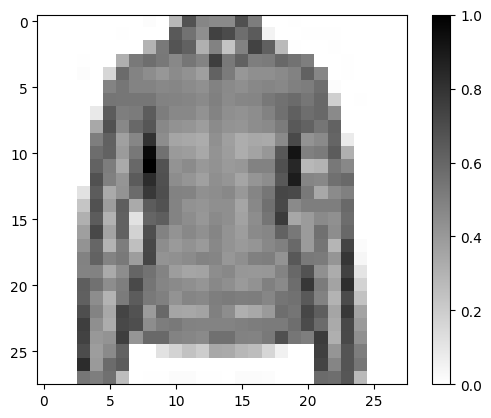

In [7]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### Visualize more images

2024-02-17 12:06:00.583441: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


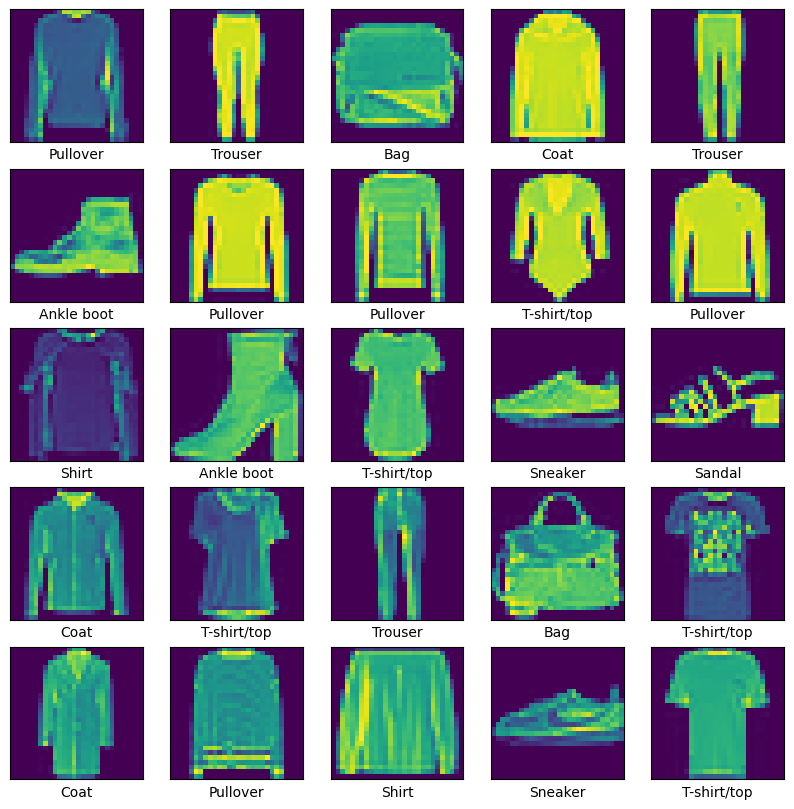

In [8]:
plt.figure(figsize = (10, 10))

for i, (images, labels) in enumerate(train_dataset.take(25)):
    images = images.numpy().reshape((28, 28))
    
    plt.subplot(5, 5, i+1)
    plt.imshow(images)
#     plt.colorbar()
    plt.xlabel(class_names[labels])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

### Build a model

#### Set up the layers

In [9]:
layer2 = tf.keras.layers.Dense(128, activation = tf.nn.relu)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    layer2,
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

### Compile model

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

### Train the model

In [11]:
BATCH_SIZE = 32
EPOCHS = 5
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs = EPOCHS, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


ValueError: in user code:

    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/losses.py", line 2929, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/losses.py", line 2876, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'sparse_categorical_crossenthropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


### Evaluate Accuracy

In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print("Accuracy on test dataset: ", test_accuracy)

ValueError: in user code:

    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/login/.myenv/.myenv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (28, 28)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(28, 28, 1), dtype=float32)
      • training=False
      • mask=None
